# Kalman Filters
In this notebook I hope to write down my thoughts and some references with respect to Kalman Filters.

I would like to, by the end of this notebook, have a good understanding of kalman filters and how they can be applied to solve position state predictions using GPS measurements (And potentially other measurements in the future).

## What is a Kalman Filter

A Kalman filter aims to produce state predictions of a system given a set of noisy measurement values over time. 
It acheives this by using joint probability distributions.

_Joint probability distributions we know are indicators of what other values might be based on whatwe observe from neighbouring feature values._



## Key Concepts

* __Measurement__: An input from our system's sensors. This will inform us of a characteristic of our system.
* __Certainty__: Certainty in this context is how much we trust a measurement or state prediction. We measure our certainty with respect to these things using Variance (Standard Deviation squared in a Guassian Distribution)
* __Prediction__: Given a measurement and a previous state along with their respective Variances, what do we think the new state of our system is.
* __Gain__: Gain is another way of describing a measurements ability to update the current state calculations. I believe this is highly correlated to the concept of the variance of a measurement. And in fact may be one in the same thing for the model we are creating below. I am unsure of my explanation here, so I would find some other sources if I was you...
                                                        

## Normal Distributions

Normal or Guassian Distributions are essentially just probability distribution functions that are good for representing real-world values (things like measurements) for independent events when the exact probability distributions are not known.


Here is the mathematical notation for a normal distribution function.

$f(x)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-(x-\mu)^{2} / 2 \sigma^{2}}$

Notice how it simply requires a mean and standard deviation (square root of Variance)

Next we will implement this math in python.



In [37]:
import math

def normal(mean, standard_deviation, x):
    # cleaner syntax ;)
    sd = standard_deviation
    
    coefficient = 1.0 / math.sqrt(2.0 * math.pi * (sd**2))
    e_with_exponent = math.exp(-0.5 * (x - mean)**2/(sd**2))
    
    return coefficient * e_with_exponent


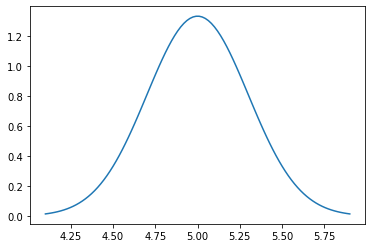

In [40]:
import matplotlib.pyplot as plt
import numpy as np

mean = 5
std_d = 0.3

x = np.linspace(mean - 3*std_d, mean + 3*std_d, 100)
y = [normal(mean, std_d, val) for val in x]

plt.plot(x, y)
plt.show()


## State

State in our system to our output. That is to say its the one thing that we are attempting to acheive an estimate for through the use of our kalman filter. In a system we could have various sensors creating inputs/measurements that we can then use to inform our state. However, we know that for every measurement coming from our sensors there is some degree of noise, thus we need to build our kalman filters to help us to predict our state.

The next thing we want to understand is that our best guess for the current state is the mean in one of these normal distributions. Our uncertainty (due to inaccurate sensor measurements) will be represented by the standard deviation or variance within this normal distribution.

## Predicting State

The question now becomes, okay, say we have some state (the mean in our normal distribution), but we also have some new measurements in our system regarding the outside world (acceleration for example), we now want to update our state given this new information we have acquired. How do we go about doing that?

For this we think back to Bayes Theorem. What is the probability of X (our new measurement), given Y our prior state.

Without going in to too much detail, we essentially want the prediction to sway in the direction of the distribution who has the highest level of certainty (which is the lowest standard deviation) as such we perform a weighted average between our measurement and our prior state.

This is the function we are going to use for our weighted average:
* $\mu$ is our prior state
* $\nu$ is our measured state
* $\sigma^{2}$ is our prior state variance
* $r^{2}$ is our measurement variance

$\mu^{\prime}=\frac{r^{2} \mu+\sigma^{2} \nu}{r^{2}+\sigma^{2}}$

__Importantly__, you can see that if our prior state has a larger variance it will mean that our measurement mean will have a stronger affect on our new mean, and vice versa.

The next piece is simply updating our new variance, for this we simply take the average between the two variances.
